In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

# Import Dataset

In [178]:
df = pd.read_csv("./data/airline.csv", index_col="Date", parse_dates=["Date"])
df.head()

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


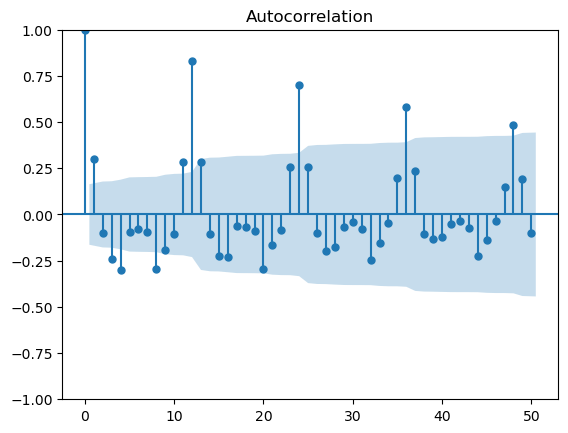

In [180]:
plot_acf(df.passengers.diff().dropna(), lags=50);

# Forecasting Method

- Naive
- Simple Moving Average
- Holt Winterz
- ARIMA

## Naive Method

Naive in time series modeling refers to the tendency to assume that future data points will behave in a similar way to past data points. This assumption ignores the underlying trends and patterns that may be present in the data and can lead to inaccurate predictions.

In [182]:
df_forecasted = df.copy()
df_forecasted["naive_method"] = df.shift(1)
df_forecasted.head()

,passengers,naive_method
Date,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


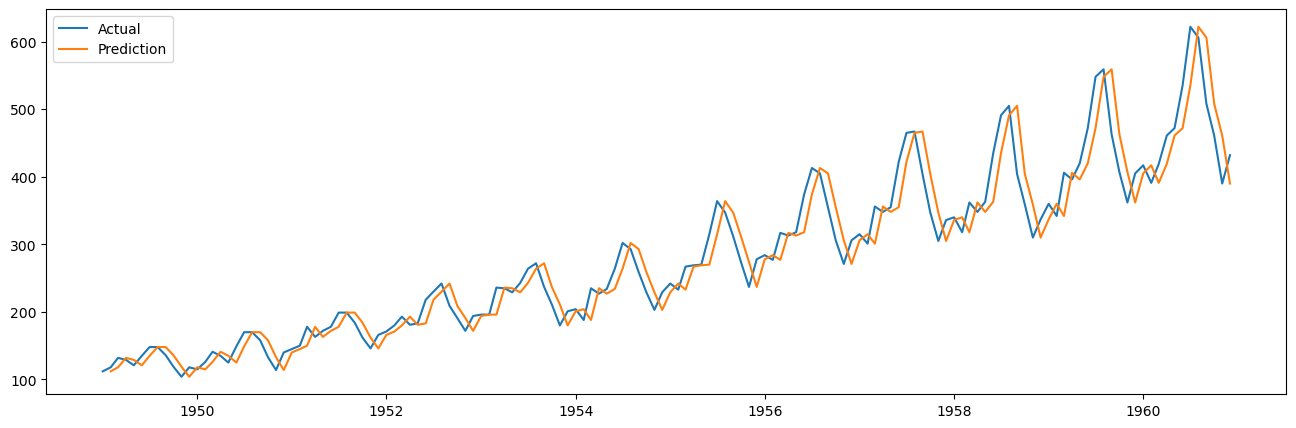

In [183]:
plt.figure(figsize=(16, 5))
plt.plot(df_forecasted.index, df_forecasted.passengers, label="Actual")
plt.plot(df_forecasted.index, df_forecasted.naive_method, label="Prediction")
plt.legend()

In [184]:
df_forecasted.dropna(inplace=True)
mean_absolute_error(df_forecasted.passengers, df_forecasted.naive_method)

25.86013986013986

## Simple Moving Average


A moving average in time series modeling is a technique used to smooth out short-term fluctuations in data to more clearly reveal longer-term trends or cycles. It involves taking the average of a certain number of data points in a series, typically over a period of time, such as a month or a year. The average is then used as a point of comparison to measure changes in the data.

In [186]:
df_forecasted = df.copy()
df_forecasted["t-1"] = df.shift(1)
df_forecasted["t-2"] = df.shift(2)
df_forecasted["t-3"] = df.shift(3)
df_forecasted["sma"] = df_forecasted.apply(lambda x: np.mean([
    x["t-1"] , 
    x["t-2"], 
    x["t-3"]]), 
    axis=1
)
df_forecasted.head()

,passengers,t-1,t-2,t-3,sma
Date,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,120.666667
1949-05-01,121,129.0,132.0,118.0,126.333333


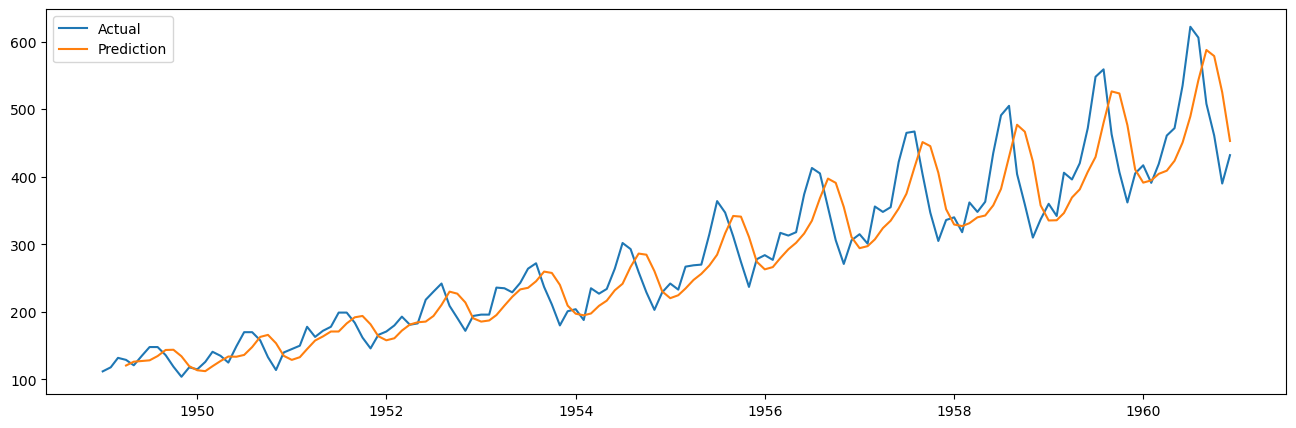

In [187]:
plt.figure(figsize=(16, 5))
plt.plot(df_forecasted.index, df_forecasted.passengers, label="Actual")
plt.plot(df_forecasted.index, df_forecasted.sma, label="Prediction")
plt.legend();

In [188]:
df_forecasted.dropna(inplace=True)
mean_absolute_error(df_forecasted.passengers, df_forecasted.sma)

36.14420803782506

## Simple Exponential Smoothing

Simple exponential smoothing is a type of moving average that gives greater weight to more recent data points, making it better at predicting trends in data over time. This method is suitable for forecasting data with no clear **trend** or **seasonal** pattern

In [192]:
model = SimpleExpSmoothing(df.passengers)
model_fit = model.fit(smoothing_level=0.5)
last_month_predicted = model_fit.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1])
last_month_actual = df.tail(100)
mean_absolute_error(last_month_actual, last_month_predicted)

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


38.11513832323558

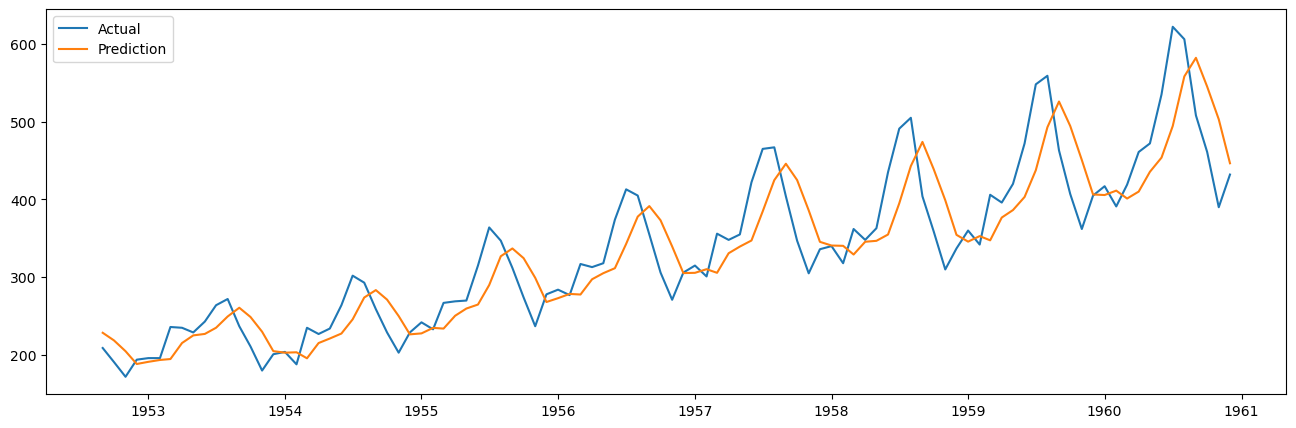

In [193]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# Double Exponential Smoothing

Double exponential smoothing is an even more sophisticated technique that takes into account both the short-term and long-term trends in the data, making it more accurate in predicting future values. Holt (1957) extended simple exponential smoothing to allow the forecasting of data with a trend

In [194]:
model = ExponentialSmoothing(df.passengers, trend='add', seasonal=None)
model_fit = model.fit(smoothing_trend=0.01, smoothing_level=0.5)
last_month_predicted = model_fit.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1])
last_month_actual = df.tail(100)
mean_absolute_error(last_month_actual, last_month_predicted)

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


37.76759299440961

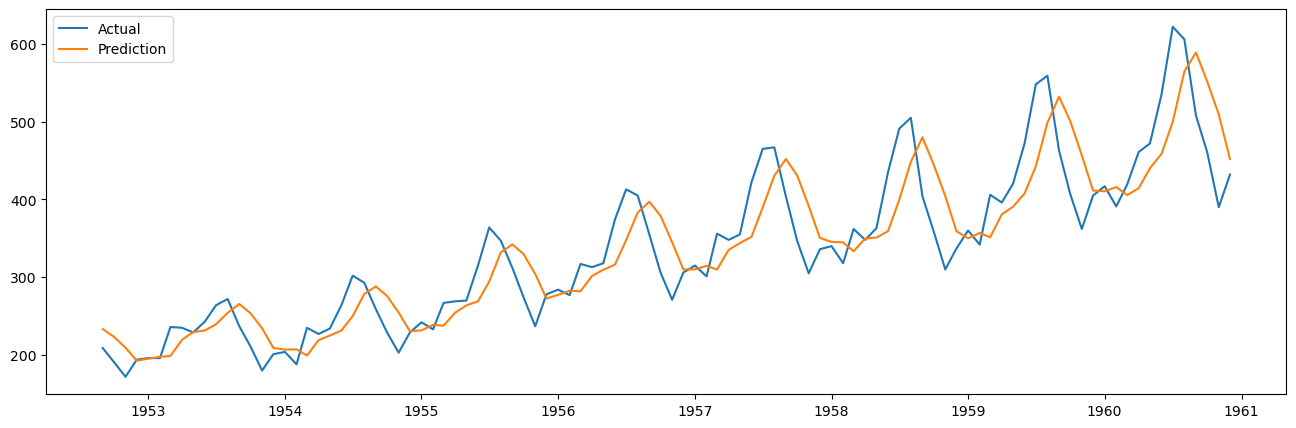

In [195]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# Triplet Exponential Smoothing

Triplet exponential smoothing is an even more complex version of exponential smoothing that adds a third parameter to the equation, making it even better at predicting future values. Holt (1957) and Winters (1960) extended Holt’s method to capture seasonality

In [198]:
model = ExponentialSmoothing(df.passengers, trend='add', seasonal="mul", seasonal_periods=12)
model_fit = model.fit(smoothing_trend=0.01, smoothing_level=0.5, smoothing_seasonal=0.65, )
last_month_predicted = model_fit.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1])
last_month_actual = df.tail(100)
mean_absolute_error(last_month_actual, last_month_predicted)

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


8.736061590320261

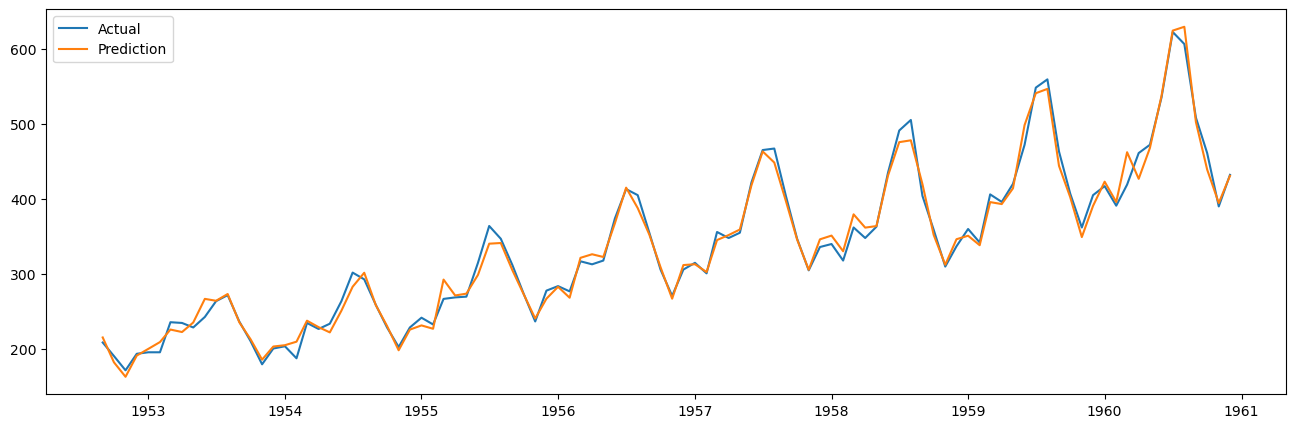

In [197]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# ARIMA

- AR: Autoregressive models
- I: Integrated
- MA: Moving average models

##  Stationarity and differencing

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary it does not matter when you observe it, it should look much the same at any point in time.

<AxesSubplot: >

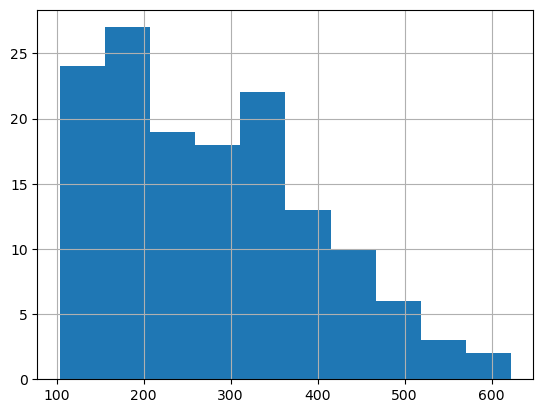

In [199]:
df.passengers.hist()

# Augmented Dickey-Fuller (ADF) Test
Another way to determine more objectively if differencing is required is to use a unit root test and one of the most popular test is the Augmented Dickey-Fuller (ADF) test.

If p-value > 0.05, then it is non statitioner

In [201]:
adfuller(df.passengers)[1]

0.991880243437641

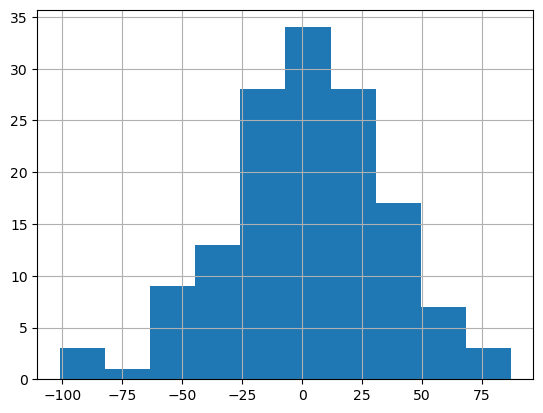

In [202]:
df.passengers.diff().dropna().hist();

In [203]:
adfuller(df.passengers.diff().dropna())[1]

0.05421329028382468

In [204]:
adfuller(df.passengers.diff().dropna().diff().dropna())[1]

2.732891850014085e-29

## AR: Autoregressive models

In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable

In [205]:
I = ARIMA(df.passengers, order=(0, 1, 0)) # [p, d, q]
model = I.fit()
last_month_predicted = model.predict(start=df.passengers.tail(100).index[0], end=df.passengers.tail(100).index[-1], typ="levels")
last_month_actual = df.passengers.tail(100)
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

MAE: 31.48


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [206]:
AR = ARIMA(df.passengers, order=(4, 1, 0))
model = AR.fit()
last_month_predicted = model.predict(start=df.passengers.tail(100).index[0], end=df.passengers.tail(100).index[-1], typ="levels")
last_month_actual = df.passengers.tail(100)
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 29.080223296838522


### Using PACF Plot

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


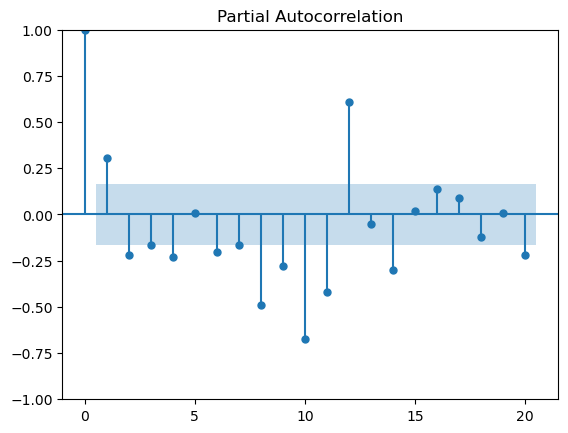

In [207]:
plot_pacf(df.passengers.diff().dropna(), lags=20);

## Moving Average

In [211]:
MA = ARIMA(df.passengers, order=(0, 1, 0))
model = MA.fit()
last_month_predicted = model.predict(start=df.passengers.tail(100).index[0], end=df.passengers.tail(100).index[-1], typ="levels")
last_month_actual = df.passengers.tail(100)
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

MAE: 31.48


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


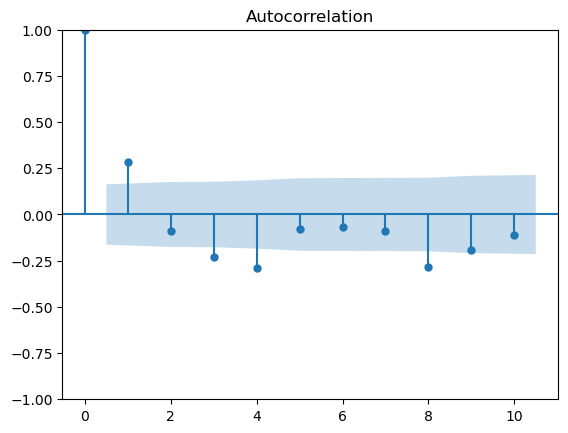

In [212]:
plot_acf(model.resid, lags=10);

## ARIMA

In [213]:
arima = ARIMA(df.passengers, order=(4, 1, 4))
model = arima.fit()
last_month_predicted = model.predict(start=df.passengers.tail(100).index[0], end=df.passengers.tail(100).index[-1], typ="levels")
last_month_actual = df.passengers.tail(100)
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 21.371350332231955


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [214]:
P_opts = [1, 2, 3, 4]
D_opts = [0, 1, 2]
Q_opts = [1, 2, 3, 4]
best_score = 100
best_params = [0, 0, 0]
for p in P_opts:
    for d in D_opts:
        for q in Q_opts:
            arima = ARIMA(df.passengers, order=(p, d, q))
            model = arima.fit()
            last_month_predicted = model.predict(start=df.passengers.tail(100).index[0], end=df.passengers.tail(100).index[-1], typ="levels")
            last_month_actual = df.passengers.tail(100)
            mae = mean_absolute_error(last_month_actual, last_month_predicted)
            print(f"MAE: {mae}")
            if best_score > mae:
                best_score = mae
                best_params = [p, d, q]
                
best_score, best_params

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\sta

MAE: 29.331252118413463


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 29.526256951193663


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 29.0389311360269


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 26.091794653399564
MAE: 29.49291569630941


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\sta

MAE: 28.743319985638045


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 28.344474046456334


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 26.01159796871217


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 30.49451402992085


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 29.765026249123093


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 29.684618212192646


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 29.660354358534992


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\sta

MAE: 28.91017026942214


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 28.59378770171521


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 28.329281655689925


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 25.97436452625644
MAE: 27.654883276896413


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\sta

MAE: 24.020335610637584
MAE: 27.866381241553217


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rama\miniconda3\envs\deep_learning_

MAE: 23.894221071121688
MAE: 30.158937140565058


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 29.66870130522828


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rama\miniconda3\envs\deep_learning_

MAE: 29.678745046791267


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 25.391544539895484
MAE: 28.48132152313992


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 28.51226710319314


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\li

MAE: 23.667803150180152


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 23.833478619391062
MAE: 27.267682103951596


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 27.49042294420515


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 22.654804429330962


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 23.518762182186038
MAE: 29.57834827157395


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 29.727488859327718


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 27.6774606521955


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rama\miniconda3\envs\deep_learning_

MAE: 26.61206489982349
MAE: 28.71576367986488


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 27.537816703379757


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\li

MAE: 25.842463424782505


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 24.279418967705578
MAE: 28.21022035562677


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 26.214825811676075


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 24.581754776353705


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rama\miniconda3\envs\deep_learning_course\li

MAE: 21.371350332231955
MAE: 29.37754338337083


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 28.645119275914258


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 26.697459955187977


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\en

MAE: 26.180404683257436


C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(21.371350332231955, [4, 1, 4])

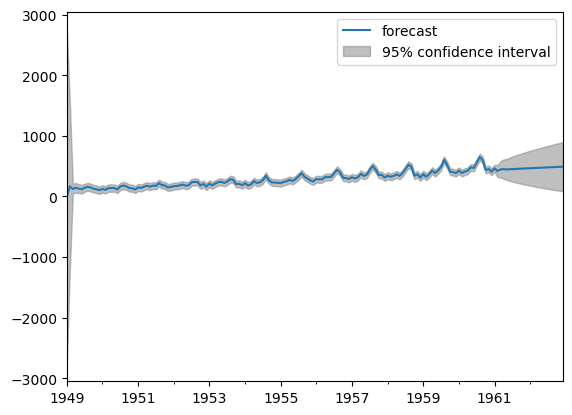

In [161]:
plot_predict(result=model, end=len(passengers) + 24);

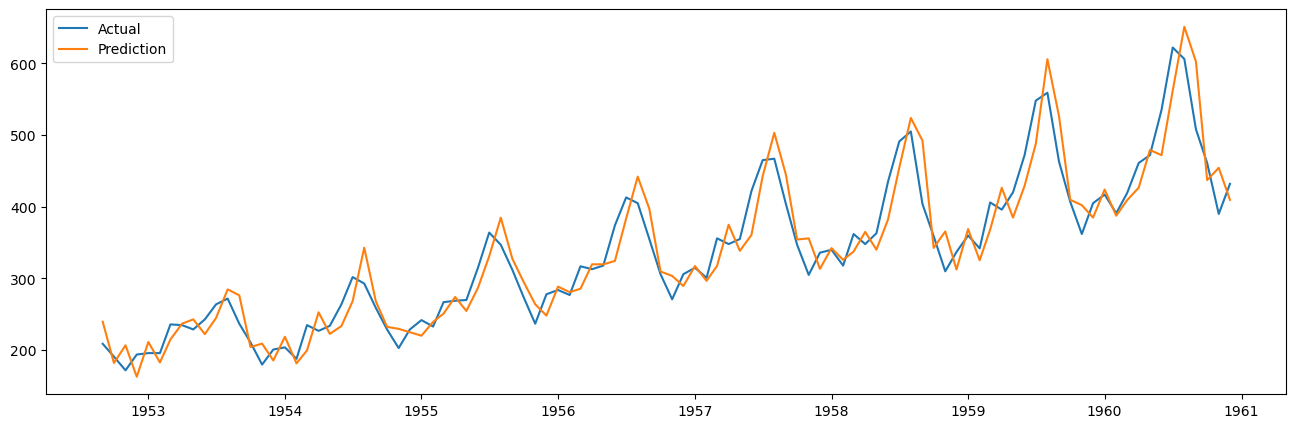

In [215]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# Problem with ARIMA

It does not support seasonal data. That is a time series with a repeating cycle.



# What is SARIMA?

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [216]:
my_order = (4, 1, 4)
my_seasonal_order = (1, 1, 2, 12)
# define model
sarimax = SARIMAX(df.passengers, order=my_order, seasonal_order=my_seasonal_order)
model = sarimax.fit()
last_month_predicted = model.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1], typ="levels")
last_month_actual = df.tail(100)
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rama\miniconda3\envs\deep_learning_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

MAE: 8.22267811886444


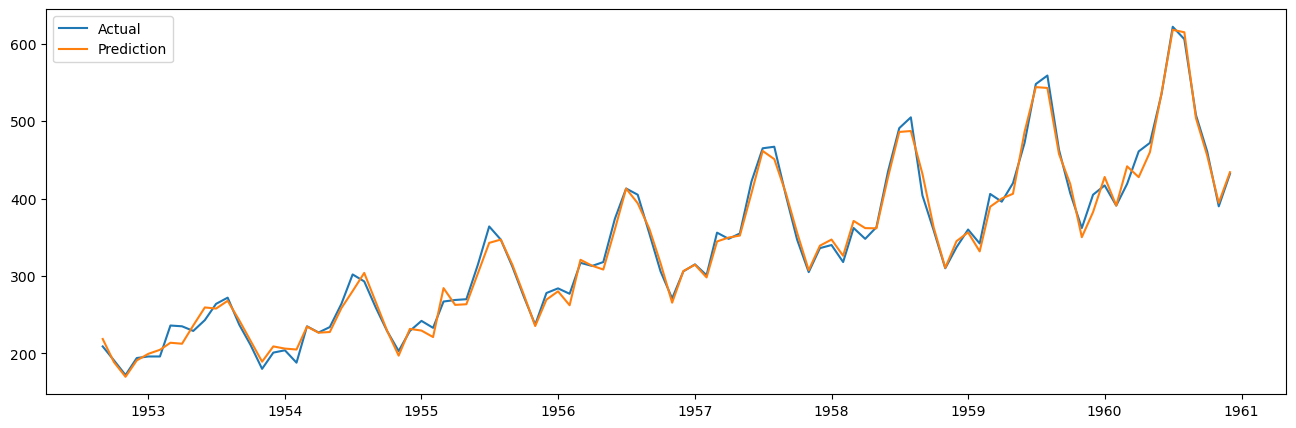

In [217]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

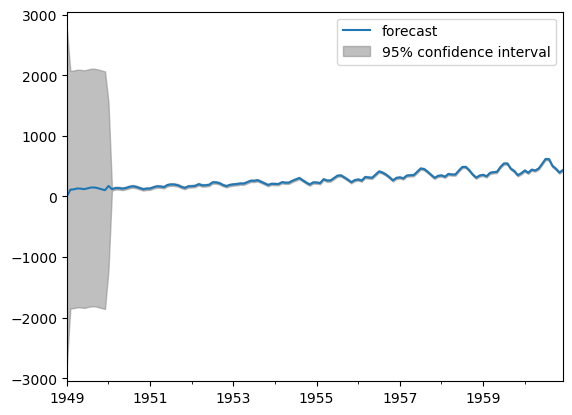

In [220]:
plot_predict(result=model, end=df.tail(100).index[-1]);